In [ ]:
# Member:
#1 Nguyễn Công Thành: 19146120
#2 Nguyễn Quang Minh: 19146094
#3 Trần Quốc Toàn : 19146090 (lop thu 4)
#3 Phan Hồng Bảo  19144051


In [ ]:
#kết nối với gg drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#import thư viện
import numpy as np
from tensorflow import keras
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from keras import backend as K
import pickle


In [ ]:
#load feature đã xử lý và resize từ trước
pickle_in = open("gdrive/MyDrive/age/X.pickle","rb")
x = pickle.load(pickle_in)

In [ ]:
x.shape

(22946, 100, 100, 3)

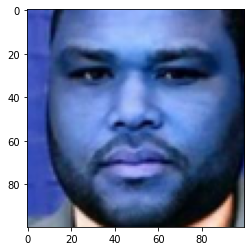

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x[1])

In [ ]:
import cv2 as cv
x_train = []
for i in range(x.shape[0]):  
  xi=  cv.cvtColor(x[i],cv.COLOR_BGR2RGB)
  x_train.append(xi)

In [ ]:
x_train = np.array(x_train)

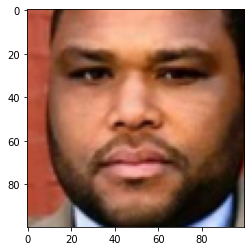

In [ ]:
plt.imshow(x_train[1])

In [ ]:
#load label
pickle_in = open("gdrive/MyDrive/age/y.pickle","rb")
y = pickle.load(pickle_in)

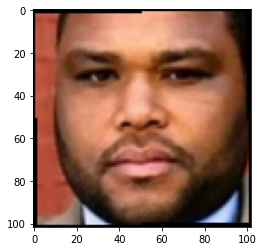

In [ ]:
from scipy import ndimage

#rotation angle in degree
rotated = ndimage.rotate(x_train[1], 1)
rotated.shape
plt.imshow(rotated)

In [ ]:
#phương pháp tính theo kiểu liên tục, tuyến tính
#đầu vào y là số nguyên
#đâu ra y là một số thực
#sai số tính bằng mse lấy bình phương trị tuyệt đối của hiệu (y_real và y_predicted)

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(252,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mse',optimizer=keras.optimizers.Adam(),metrics=['mae'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 conv2d_17 (Conv2D)          (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 50, 50, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_18 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 50, 50, 64)       

In [ ]:
hist = model.fit(x_train, y,batch_size=32,epochs=50,verbose=1,validation_split=(0.1))

Epoch 1/50
646/646 [==============================] - 96s 126ms/step - loss: 8.8451 - mae: 2.1769 - val_loss: 5.6641 - val_mae: 1.7171
Epoch 2/50
646/646 [==============================] - 78s 120ms/step - loss: 4.1460 - mae: 1.4787 - val_loss: 3.9055 - val_mae: 1.4288
Epoch 3/50
646/646 [==============================] - 78s 120ms/step - loss: 3.2689 - mae: 1.3155 - val_loss: 3.5321 - val_mae: 1.3485
Epoch 4/50
646/646 [==============================] - 78s 120ms/step - loss: 2.6668 - mae: 1.1850 - val_loss: 3.4755 - val_mae: 1.3638
Epoch 5/50
646/646 [==============================] - 78s 120ms/step - loss: 2.3500 - mae: 1.1179 - val_loss: 2.8560 - val_mae: 1.1962
Epoch 6/50
646/646 [==============================] - 78s 121ms/step - loss: 2.0784 - mae: 1.0590 - val_loss: 3.5036 - val_mae: 1.3439
Epoch 7/50
646/646 [==============================] - 78s 120ms/step - loss: 1.8225 - mae: 0.9925 - val_loss: 2.7228 - val_mae: 1.1623
Epoch 8/50
646/646 [==============================] - 7

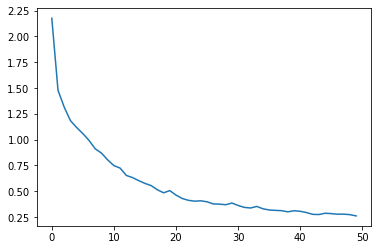

In [ ]:
plt.plot(hist.history['mae'])

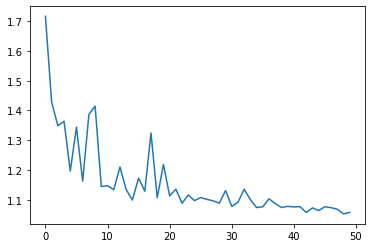

In [ ]:
plt.plot(hist.history['val_mae'])

In [ ]:
#model.save('gdrive/MyDrive/age/saved_model/deadline_linear.h5')
model.save('linear.h5')

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
from keras.models import load_model
import numpy as np  
import matplotlib.pyplot as plt
import cv2 

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img

36-40 tuoi
36-40 tuoi


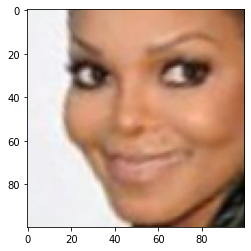

In [ ]:
#test ket qua theo kiểu linear
#nho chuyển y về lại integer
labels = {0: '1-5 tuoi',
          1: '6-10 tuoi',    
          2: '11-15 tuoi',          
          3: '16-20 tuoi',          
          4: '21-25 tuoi',
          5: '26-30 tuoi',         
          6: '31-35 tuoi',
          7: '36-40 tuoi',
          8: '41-45 tuoi',
          9: '46-50 tuoi',
          10: '51-55 tuoi',
          11: '56-60 tuoi',
          12: '61-65 tuoi',
          13: '65-70 tuoi',
          14: '71 -75 tuoi',
          15: '75-80 tuoi',
          16: '80-85 tuoi',
          17: '85 tro len'}

	# load model
plt.imshow(x_train[2])
model = load_model('linear.h5')
	# predict the class
img = img_to_array(x_train[2])

img = img.reshape(1,100,100,3)  
result = model.predict(img)
#print(result)
#np.argmax(result) 
print(labels[int(result)])   
print(labels[(y[2])])

In [ ]:
img = load_image('gdrive/MyDrive/age/train/0/2_1_4_20161221195137728.jpg.chip.jpg')

plt.imshow(img)
img = img_to_array(img)
img.shape
img = img.reshape(1,100,100,3)  
result = model.predict(img)
#print(result)
#np.argmax(result) 
print('expectation',labels[int(result)]) 

In [ ]:
img = load_image('gdrive/MyDrive/age/test/hoa.png')

plt.imshow(img)
img = img_to_array(img)
img.shape
img = img.reshape(1,100,100,3)  
result = model.predict(img)
#print(result)
#np.argmax(result) 
print('expectation',labels[int(result)]) 

In [ ]:
img = load_image('gdrive/MyDrive/age/thanh.jpg')

plt.imshow(img)
img = img_to_array(img)
img.shape
img = img.reshape(1,100,100,3)  
result = model.predict(img)
#print(result)
#np.argmax(result) 
print('expectation',labels[int(result)]) 

In [ ]:
img = load_image('gdrive/MyDrive/age/huy.png')

plt.imshow(img)
img = img_to_array(img)
img.shape
img = img.reshape(1,100,100,3)  
result = model.predict(img)
#print(result)
#np.argmax(result) 
print('expectation',labels[int(result)]) 

expectation 31-35 tuoi


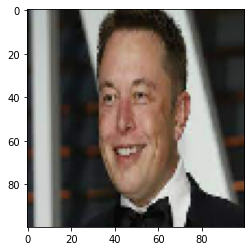

In [ ]:
kernel = np.array([[-1,-1,-1], 
                    [-1, 9,-1],
                    [-1,-1,-1]])
img = load_image('musk.jpg')

plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.filter2D(img,-1,kernel)
#img = cv2.GaussianBlur(img,(9,9),0,0)
#img = cv2.filter2D(img,-1,kernel)

img = img.reshape(1,100,100,3)  
result = model.predict(img)
#print(result)
#np.argmax(result) 
print('expectation',labels[np.abs(int(result))]) 

[[7.1209087]]
expectation 36-40 tuoi


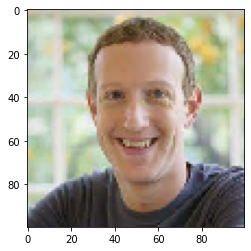

In [ ]:
img = load_image('mark.jpg')

plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.GaussianBlur(img,(37,37),0,0)
#img = cv2.filter2D(img,-1,kernel)
img = img.reshape(1,100,100,3)  
result = model.predict(img)
print(result)
#np.argmax(result) 
print('expectation',labels[np.abs(int(result))]) 

expectation 21-25 tuoi


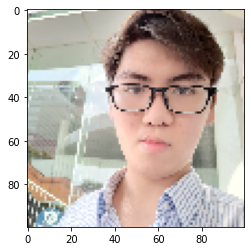

In [ ]:
img = load_image('thanh.jpg')

plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.GaussianBlur(img,(35,35),0,0)
#img = cv2.filter2D(img,-1,kernel)

img = img.reshape(1,100,100,3)  
result = model.predict(img)
#print(result)
#np.argmax(result) 
print('expectation',labels[int(result)]) 

expectation 21-25 tuoi


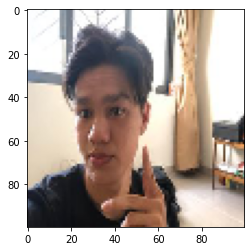

In [ ]:
img = load_image('ming.jpg')

plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.GaussianBlur(img,(45,45),0,0)
#img =img.astype('float')
#img/=255
img = img.reshape(1,100,100,3)  
result = model.predict(img)
#print(result)
#np.argmax(result) 
print('expectation',labels[int(result)]) 

In [ ]:
np.abs(-1)